$$
\text{This is the cutdown companion Jupyter notebook of Chapter 2, Postulates of Quantum Mechanics, of the book titled:}$$
$$\text{ "Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900.}$$

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#2. Postulates of Quantum Mechanics

# Technical requirements

Install NumPy using the following command:

In [ ]:
# pip install numpy

Install SymPy using the following command:

In [ ]:
pip install sympy

Install Qiskit using the following command:

In [ ]:
pip install qiskit

Install Qiskit visualization support using the following command:

In [ ]:
pip install 'qiskit[visualization]'

Import the required functions and class methods. The array_to_latex function() returns a Latex representation of a complex array with dimension 1 or 2:

In [ ]:
from qiskit.visualization import array_to_latex

Import math libraries using the following commands:

In [ ]:
import cmath
import math

# 2.1. Postulate 1 - Wave functions

## 2.1.1. Spherical harmonic functions

### Importing NumPy, SciPy and Matplotlib Python modules



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import sph_harm

### Setting-up grids of polar (theta - $\theta$) and azimuthal (phi - $\phi$)

In [ ]:
def setup_grid(num=100):
  theta = np.linspace(0, np.pi, num)
  phi = np.linspace(0, 2*np.pi, num)
  # Create a 2D NumPy meshgrid from two 1D arrays of theta, phi coordinates
  theta, phi = np.meshgrid(theta, phi)
  # Compute cartesian coordinates with radius r = 1
  xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])
  return (theta, phi, xyz)

In [ ]:
(theta, phi, xyz) = setup_grid()
print("Shape of meshgrid arrays, theta: {}, phi: {}, xyz: {}".format(theta.shape, phi.shape, xyz.shape))

Shape of meshgrid arrays, theta: (100, 100), phi: (100, 100), xyz: (3, 100, 100)


### Coloring the plotted surface of the real functions of the spherical harmonic function (Y)


In [ ]:
def colour_plot(ax, Y, Yx, Yy, Yz, cmap):
  # Colour the plotted surface according to the sign of Y.real
  # https://matplotlib.org/stable/gallery/mplot3d/surface3d.html?highlight=surface%20plots
  # https://matplotlib.org/stable/tutorials/colors/colormaps.html
  cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap(cmap))
  cmap.set_clim(-0.5, 0.5)
  ax.plot_surface(Yx, Yy, Yz,
                  facecolors=cmap.to_rgba(Y.real),
                  rstride=2, cstride=2)
  return

### Drawing a set of $x$, $y$, $z$ axes for reference

In [ ]:
def draw_axes(ax, ax_lim, title):
  ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
  ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
  ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)

  # Set the limits, set the title and then turn off the axes frame
  ax.set_title(title)
  ax.set_xlim(-ax_lim, ax_lim)
  ax.set_ylim(-ax_lim, ax_lim)
  ax.set_zlim(-ax_lim, ax_lim)
  ax.axis('off')
  return

### Defining a function which computes the real form of the spherical harmonic Y

In [ ]:
def comb_Y(l, m, theta, phi):
  Y = sph_harm(abs(m), l, phi, theta)
  if m < 0:
    Y = np.sqrt(2) * (-1)**m * Y.imag
  elif m > 0:
    Y = np.sqrt(2) * (-1)**m * Y.real
  return Y

### Defining a function that displays the spatial wave functions for a range of values of the angular momentum quantum number and the magnetic quantum number

In [ ]:
def plot_orbitals(k, cmap = 'autumn'):
  for l in range(0, k+1):
    for m in range(-l, l+1):
      fig = plt.figure(figsize=plt.figaspect(1.))
      (theta, phi, xyz) = setup_grid()
      ax = fig.add_subplot(projection='3d')
      Y = comb_Y(l, m, theta, phi)
      title = r'$l={{{}}}, m={{{}}}$'.format(l, m)
      Yx, Yy, Yz = np.abs(Y) * xyz
      colour_plot(ax, Y, Yx, Yy, Yz, cmap)
      draw_axes(ax, 0.5, title)
      fig_name = 'Hydrogen_l'+str(l)+'_m'+str(m)
      plt.savefig(fig_name)
      plt.show()
  return

## Spatial wave functions of the hydrogen atom
The result is shown in Figure 2.4.

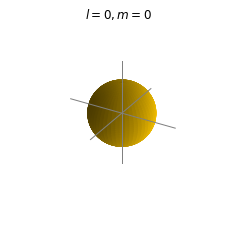

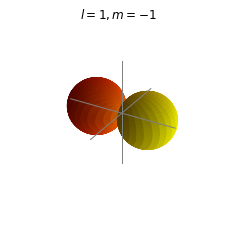

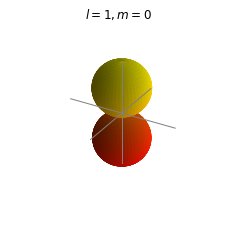

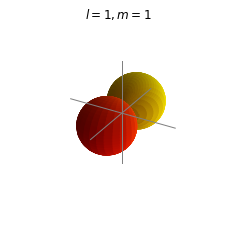

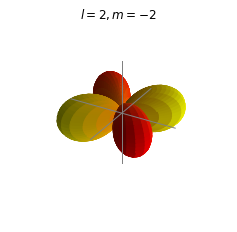

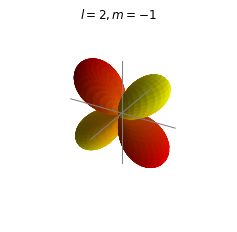

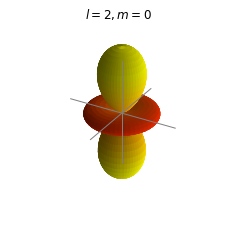

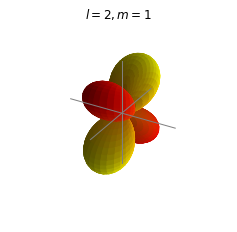

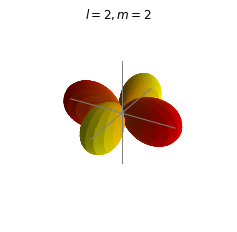

In [ ]:
plot_orbitals(2)

## 2.1.2. Addition of momenta using Clebsch-Gordan coefficients

In [ ]:
import sympy
from sympy import S
from sympy.physics.quantum.cg import CG, cg_simp

### Defining a Clebsch-Gordan coefficient and evaluating its value

#### Fermionic spin pairing to the symmetric state $|s_{1,2}=1, m_{s_{1,2}}:

In [ ]:
CG(S(1)/2, S(1)/2, S(1)/2, -S(1)/2, 1, 0).doit()

sqrt(2)/2

In [ ]:
CG(S(1)/2, -S(1)/2, S(1)/2, S(1)/2, 1, 0).doit()

sqrt(2)/2

Figure 2.5 – Defining a Clebsch-Gordan coefficient and evaluating its value

#### Fermionic spin pairing to antisymmetric state $(s_{1,2}=0,m_{s_{1,2}}=0)$


In [ ]:
CG(S(1)/2, S(1)/2, S(1)/2, -S(1)/2, 0, 0).doit()

sqrt(2)/2

In [ ]:
CG(S(1)/2, -S(1)/2, S(1)/2, S(1)/2, 0, 0).doit()

-sqrt(2)/2

Figure 2.6 – Defining a Clebsch-Gordan coefficient and evaluating its value




#### Coupling spin and angular momentum

In [ ]:
CG(1, 0, S(1)/2, S(1)/2, S(1)/2, S(1)/2).doit()

-sqrt(3)/3

In [ ]:
CG(1, 1, S(1)/2, -S(1)/2, S(1)/2, S(1)/2).doit()

sqrt(6)/3

In [ ]:
CG(1, -1, S(1)/2, S(1)/2, S(1)/2, S(1)/2).doit()

0

Figure 2.7 – Defining a Clebsch-Gordan coefficient and evaluating its value

### Spatial wave functions of different states of the nitrogen atom with 3 $p$ electrons

#### Spatial wave function of the ground state of the nitrogen atom with 3 $p$ electrons in $L=0, M=0$

#### Setting-up a dictionary of six configuration tuples

In [ ]:
T00 = {0: (1,-1, 1,0,  1,-1, 1,1,  0,0), 
       1: (1,-1, 1,1,  1,0,  1,0,  0,0),
       2: (1,0,  1,-1, 1,-1, 1,1,  0,0),
       3: (1,0,  1,1,  1,1,  1,-1, 0,0),
       4: (1,1,  1,-1, 1,0,  1,0,  0,0),
       5: (1,1,  1,0,  1,1,  1,-1, 0,0)}

#### Defining a function which computes a product of Clebsch-Gordan coefficients


In [ ]:
def comp_CG(T, k, display = None):
  CGk = CG(*T[k][0:6]) * CG(*T[k][4:10])
  if display:
    print('CG(', *T[k][0:6], ') = ', CG(*T[k][0:6]).doit())
    print('CG(', *T[k][4:10], ') = ', CG(*T[k][4:10]).doit())
    print("CG{} =".format(k), 'CG(', *T[k][0:6], ') * CG(', *T[k][4:10], ') = ', CGk.doit())
  return CGk

In [ ]:
CG0 = comp_CG(T00, 0, display=True)

CG( 1 -1 1 0 1 -1 ) =  -sqrt(2)/2
CG( 1 -1 1 1 0 0 ) =  sqrt(3)/3
CG0 = CG( 1 -1 1 0 1 -1 ) * CG( 1 -1 1 1 0 0 ) =  -sqrt(6)/6


#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T00)):
  s = 'CG' + str(k) +' = comp_CG(T00, ' + str(k) + ')'
  exec(s)

s00 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit())]

print(s00)

['CG0: -sqrt(6)/6, CG1: sqrt(6)/6, CG2: sqrt(6)/6, CG3: -sqrt(6)/6, CG4: -sqrt(6)/6, CG5: sqrt(6)/6']


#### Defining a set of spatial wave functions

In [ ]:
def Y_phase(theta, phi):

  Y10a = comb_Y(1, 0, theta, phi)
  Y11a = comb_Y(1, 1, theta, phi)
  Y1m1a = comb_Y(1, -1, theta, phi)

  Y10b = comb_Y(1, 0, theta, phi+1*np.pi/3)
  Y11b = comb_Y(1, 1, theta, phi+1*np.pi/3)
  Y1m1b = comb_Y(1, -1, theta, phi+1*np.pi/3)

  Y10c = comb_Y(1, 0, theta, phi+2*np.pi/3)
  Y11c = comb_Y(1, 1, theta, phi+2*np.pi/3)
  Y1m1c = comb_Y(1, -1, theta, phi+2*np.pi/3)

  return(Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c)

#### Computing the wave function of the ground state of the nitrogen atom with 3 $p$ electrons $(L=0, M=0)$

In [ ]:
def compute_00_Y(ax_lim, cmap, title,  fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y1m1a * Y10b * Y11c
  Y_01 = float(CG1.doit()) * Y1m1a * Y11b * Y10c
  Y_02 = float(CG2.doit()) * Y10a * Y1m1b * Y11c
  Y_03 = float(CG3.doit()) * Y10a * Y11b * Y1m1c
  Y_04 = float(CG4.doit()) * Y11a * Y1m1b * Y10c
  Y_05 = float(CG5.doit()) * Y11a * Y10b * Y1m1c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()

  return

#### Displaying the wave function of the ground state of Nitrogen with 3 $p$ electrons $(L=0, M=0)$

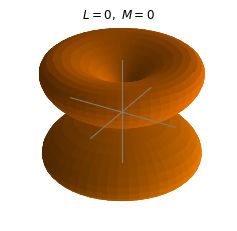

In [ ]:
title = '$L=0,\ M=0$'
fig_name ='Nitrogen_3p_L0_M0.png'
compute_00_Y(0.01, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=0)$

### Setting-up a dictionary of configuration arrays

#### Defining a function which computes the Clebsch-Gordan coefficients

In [ ]:
T10 = {0: (1,1,  1,0,   2,1,  1,-1, 1,0),
       1: (1,0,  1,1,   2,1,  1,-1, 1,0),
       2: (1,1,  1,-1,  2,0,  1,0,  1,0),
       3: (1,-1, 1,1,   2,0,  1,0,  1,0),
       4: (1,1,  1,0,   1,1,  1,-1, 1,0),
       5: (1,0,  1,1,   1,1,  1,-1, 1,0),
       6: (1,-1, 1,0,   2,-1, 1,1,  1,0),
       7: (1,0,  1,-1,  2,-1, 1,1,  1,0),
       8: (1,-1, 1,0,   1,-1, 1,1,  1,0),
       9: (1,0,  1,-1,  1,-1, 1,1,  1,0),
       10:(1,1,  1,-1,  0,0,  1,0,  1,0)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T10)):
  s = 'CG' + str(k) +' = comp_CG(T10, ' + str(k) + ')'
  exec(s)

s10a = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit())]
print(s10a)

s10b = ["CG5: {}, CG6: {}, CG7: {}, CG8: {}, CG9: {}, CG10: {}".
     format(CG5.doit(), CG6.doit(), CG7.doit(), CG8.doit(), CG9.doit(), CG10.doit())]
print(s10b)

['CG0: sqrt(15)/10, CG1: sqrt(15)/10, CG2: -sqrt(15)/15, CG3: -sqrt(15)/15, CG4: 1/2']
['CG5: -1/2, CG6: sqrt(15)/10, CG7: sqrt(15)/10, CG8: 1/2, CG9: -1/2, CG10: sqrt(3)/3']


#### Computing the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=0)$

In [ ]:
def compute_10_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y1m1c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y1m1c
  Y_02 = float(CG2.doit()) * Y11a * Y1m1b * Y10c
  Y_03 = float(CG3.doit()) * Y1m1a * Y11b * Y10c
  Y_04 = float(CG4.doit()) * Y11a * Y10b * Y1m1c
  Y_05 = float(CG5.doit()) * Y10a * Y11b * Y1m1c
  Y_06 = float(CG6.doit()) * Y1m1a * Y10b * Y11c
  Y_07 = float(CG7.doit()) * Y10a * Y1m1b * Y11c
  Y_08 = float(CG8.doit()) * Y1m1a * Y10b * Y11c
  Y_09 = float(CG9.doit()) * Y10a * Y1m1b * Y11c
  Y_10 = float(CG10.doit()) * Y11a * Y1m1b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07 + Y_08 + Y_09 + Y_10
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()

  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=0)$



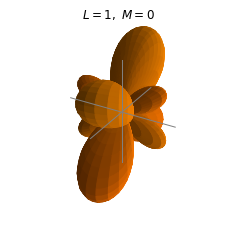

In [ ]:
title = '$L=1,\ M=0$'
fig_name ='Nitrogen_3p_L1_M0.png'
compute_10_Y(0.030, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=2, M=0)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T20 = {0: (1,1,  1,0,   2,1,  1,-1, 2,0),
       1: (1,0,  1,1,   2,1,  1,-1, 2,0),
       2: (1,0,  1,-1,  2,-1, 1,1,  2,0),
       3: (1,-1, 1,0,   2,-1, 1,1,  2,0),
       4: (1,0,  1,1,   1,1,  1,-1, 2,0),
       5: (1,1,  1,0,   1,1,  1,-1, 2,0),
       6: (1,-1, 1,0,   1,-1, 1,1,  2,0),
       7: (1,0,  1,-1,  1,-1, 1,1,  2,0),
       8: (1,1,  1,-1,  1,0,  1,0,  2,0),
       9: (1,-1, 1,1,   1,0,  1,0,  2,0)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T20)):
  s = 'CG' + str(k) +' = comp_CG(T20, ' + str(k) + ')'
  exec(s)

s20 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}, CG6: {}, CG7: {}, CG8: {}, CG9: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit(), CG6.doit(), CG7.doit(), CG8.doit(), CG9.doit())]
print(s20)

['CG0: 1/2, CG1: 1/2, CG2: -1/2, CG3: -1/2, CG4: -sqrt(3)/6, CG5: sqrt(3)/6, CG6: -sqrt(3)/6, CG7: sqrt(3)/6, CG8: sqrt(3)/3, CG9: -sqrt(3)/3']


#### Computing the wave function of the excited state of nitrogen with 3 $p$ electrons $(L=2, M=0)$

In [ ]:
def compute_20_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y1m1c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y1m1c
  Y_02 = float(CG2.doit()) * Y10a * Y1m1b * Y11c
  Y_03 = float(CG3.doit()) * Y1m1a * Y10b * Y11c
  Y_04 = float(CG4.doit()) * Y10a * Y11b * Y1m1c
  Y_05 = float(CG5.doit()) * Y11a * Y10b * Y1m1c
  Y_06 = float(CG6.doit()) * Y1m1a * Y10b * Y11c
  Y_07 = float(CG7.doit()) * Y10a * Y1m1b * Y11c
  Y_08 = float(CG8.doit()) * Y11a * Y1m1b * Y10c
  Y_09 = float(CG9.doit()) * Y1m1a * Y11b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07 + Y_08 + Y_09
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=2, M=0)$



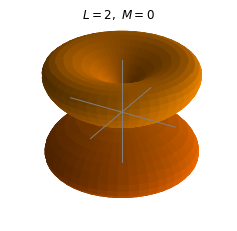

In [ ]:
title = '$L=2,\ M=0$'
fig_name ='Nitrogen_3p_L2_M0.png'
compute_20_Y(0.04, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=0)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T30 = {0: (1,1,  1,-1, 2,0,  1,0,  3,0),
       1: (1,0,  1,-1, 2,-1, 1,1,  3,0),
       2: (1,0,  1,1,  2,1,  1,-1, 3,0),
       3: (1,-1, 1,1,  2,0,  1,0,  3,0),
       4: (1,-1, 1,0,  2,-1, 1,1,  3,0),
       5: (1,1,  1,0,  2,1,  1,-1, 3,0)}

### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T30)):
  s = 'CG' + str(k) +' = comp_CG(T30, ' + str(k) + ')'
  exec(s)

s30 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit())]
print(s30)

['CG0: sqrt(10)/10, CG1: sqrt(10)/10, CG2: sqrt(10)/10, CG3: sqrt(10)/10, CG4: sqrt(10)/10, CG5: sqrt(10)/10']


#### Computing the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=0)$

In [ ]:
def compute_30_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y1m1b * Y10c
  Y_01 = float(CG1.doit()) * Y10a * Y1m1b * Y11c
  Y_02 = float(CG2.doit()) * Y10a * Y11b * Y1m1c
  Y_03 = float(CG3.doit()) * Y1m1a * Y11b * Y10c
  Y_04 = float(CG4.doit()) * Y1m1a * Y10b * Y11c
  Y_05 = float(CG5.doit()) * Y11a * Y10b * Y1m1c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=0)$



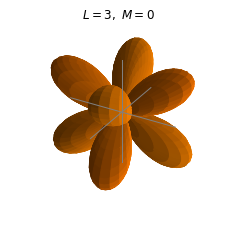

In [ ]:
title = '$L=3,\ M=0$'
fig_name ='Nitrogen_3p_L3_M0.png'
compute_30_Y(0.02, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=1)$


#### Setting-up a dictionary of configuration arrays

In [ ]:
T11 = {0: (1,1,  1,1,   2,2,  1,-1, 1,1),
       1: (1,1,  1,0,   2,1,  1,0,  1,1),
       2: (1,0,  1,0,   2,0,  1,1,  1,1),
       3: (1,1,  1,-1,  2,0,  1,1,  1,1),
       4: (1,-1, 1,1,   2,0,  1,1,  1,1),
       5: (1,0,  1,1,   2,1,  1,0,  1,1),
       6: (1,0,  1,1,   1,1,  1,0,  1,1),
       7: (1,1,  1,0,   1,1,  1,0,  1,1)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T11)):
  s = 'CG' + str(k) +' = comp_CG(T11, ' + str(k) + ')'
  exec(s)

s11 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}, CG6: {}, CG7: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit(), CG6.doit(), CG7.doit())]
print(s11)

['CG0: sqrt(15)/5, CG1: -sqrt(15)/10, CG2: sqrt(15)/15, CG3: sqrt(15)/30, CG4: sqrt(15)/30, CG5: -sqrt(15)/10, CG6: -1/2, CG7: 1/2']


#### Computing the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=1)$

In [ ]:
def compute_11_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y11b * Y11c
  Y_01 = float(CG1.doit()) * Y10a * Y10b * Y11c
  Y_02 = float(CG2.doit()) * Y11a * Y10b * Y10c
  Y_03 = float(CG3.doit()) * Y11a * Y1m1b * Y11c
  Y_04 = float(CG4.doit()) * Y1m1a * Y11b * Y11c
  Y_05 = float(CG5.doit()) * Y10a * Y11b * Y10c
  Y_06 = float(CG6.doit()) * Y10a * Y11b * Y10c
  Y_07 = float(CG7.doit()) * Y11a * Y10b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=1, M=1)$



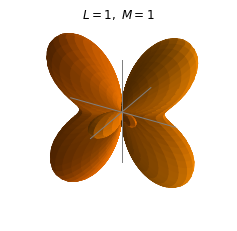

In [ ]:
title = '$L=1,\ M=1$'
fig_name ='Nitrogen_3p_L1_M1.png'
compute_11_Y(0.035, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of nitrogen with 3 $p$ electrons $(L=2, M=1)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T21 = {0: (1,1,  1,-1,  1,0,  1,1,  2,1),
       1: (1,-1, 1,1,   1,0,  1,1,  2,1),
       2: (1,1,  1,0,   1,1,  1,0,  2,1),
       3: (1,0,  1,1,   1,1,  1,0,  2,1),
       4: (1,1,  1,1,   2,2,  1,-1, 2,1),
       5: (1,1,  1,-1,  2,0,  1,1,  2,1),
       6: (1,-1, 1,1,   2,0,  1,1,  2,1),
       7: (1,1,  1,0,   2,1,  1,0,  2,1),
       8: (1,0,  1,1,   2,1,  1,0,  2,1)}

###" Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T21)):
  s = 'CG' + str(k) +' = comp_CG(T21, ' + str(k) + ')'
  exec(s)

s21 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}, CG5: {}, CG6: {}, CG7: {}, CG8: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit(), CG5.doit(), CG6.doit(), CG7.doit(), CG8.doit())]
print(s21)

['CG0: 1/2, CG1: -1/2, CG2: 1/2, CG3: -1/2, CG4: sqrt(3)/3, CG5: -sqrt(3)/6, CG6: -sqrt(3)/6, CG7: sqrt(3)/6, CG8: sqrt(3)/6']


#### Computing the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=2, M=1)$

In [ ]:
def compute_21_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y1m1b * Y11c
  Y_01 = float(CG1.doit()) * Y1m1a * Y11b * Y11c
  Y_02 = float(CG2.doit()) * Y11a * Y10b * Y10c
  Y_03 = float(CG3.doit()) * Y10a * Y11b * Y10c
  Y_04 = float(CG4.doit()) * Y11a * Y11b * Y1m1c
  Y_05 = float(CG5.doit()) * Y11a * Y1m1b * Y11c
  Y_06 = float(CG6.doit()) * Y1m1a * Y11b * Y11c
  Y_07 = float(CG7.doit()) * Y11a * Y10b * Y10c
  Y_08 = float(CG8.doit()) * Y10a * Y11b * Y10c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04 + Y_05 + Y_06 + Y_07 + Y_08
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=2, M=1)$



We assume that at least one electron has been excited to a different energy level.


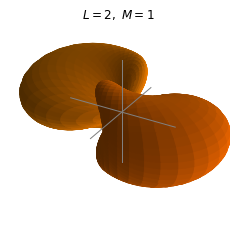

In [ ]:
print("We assume that at least one electron has been excited to a different energy level.")
title = '$L=2,\ M=1$'
fig_name ='Nitrogen_3p_L2_M1.png'
compute_21_Y(0.035, 'autumn', title, fig_name)

## Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=1)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T31 = {0: (1,1,  1,0,   2,1,  1,0,  3,1),
       1: (1,0,  1,1,   2,1,  1,0,  3,1),
       2: (1,1,  1,-1,  2,0,  1,1,  3,1),
       3: (1,-1, 1,1,   2,0,  1,1,  3,1),
       4: (1,1,  1,1,   2,2,  1,-1, 3,1)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T31)):
  s = 'CG' + str(k) +' = comp_CG(T31, ' + str(k) + ')'
  exec(s)

s31 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit())]
print(s31)

['CG0: 2*sqrt(15)/15, CG1: 2*sqrt(15)/15, CG2: sqrt(15)/15, CG3: sqrt(15)/15, CG4: sqrt(15)/15']


#### Defining a function which computes the wave function of states of the nitrogen with 3 $p$ electrons

In [ ]:
def compute_31_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y10c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y10c
  Y_02 = float(CG2.doit()) * Y11a * Y1m1b * Y11c
  Y_03 = float(CG3.doit()) * Y1m1a * Y11b * Y11c
  Y_04 = float(CG4.doit()) * Y11a * Y11b * Y1m1c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=1)$



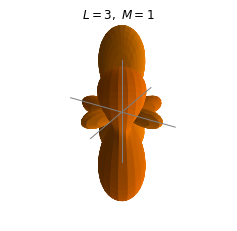

In [ ]:
title = '$L=3,\ M=1$'
fig_name ='Nitrogen_3p_L3_M1.png'
compute_31_Y(0.03, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=2, M=2)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T22 = {0: (1,1,  1,1,   2,2,  1,0,  2,2),
       1: (1,1,  1,0,   1,1,  1,1,  2,2),
       2: (1,0,  1,1,   1,1,  1,1,  2,2),
       3: (1,1,  1,0,   2,1,  1,1,  2,2),
       4: (1,0,  1,1,   2,1,  1,1,  2,2)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T22)):
  s = 'CG' + str(k) +' = comp_CG(T22, ' + str(k) + ')'
  exec(s)

s22 = ["CG0: {}, CG1: {}, CG2: {}, CG3: {}, CG4: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit(), CG3.doit(), CG4.doit())]
print(s22)

['CG0: sqrt(6)/3, CG1: sqrt(2)/2, CG2: -sqrt(2)/2, CG3: -sqrt(6)/6, CG4: -sqrt(6)/6']


#### Defining a function which computes the wave function of states of the nitrogen atom with 3 $p$ electrons

In [ ]:
def compute_22_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y11b * Y10c
  Y_01 = float(CG1.doit()) * Y11a * Y10b * Y11c
  Y_02 = float(CG2.doit()) * Y10a * Y11b * Y11c
  Y_03 = float(CG3.doit()) * Y11a * Y10b * Y11c
  Y_04 = float(CG4.doit()) * Y10a * Y11b * Y11c

  Y = Y_00 + Y_01 + Y_02 + Y_03 + Y_04
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=2, M=2)$



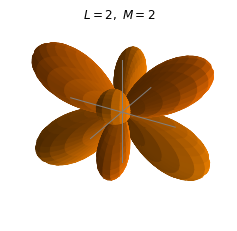

In [ ]:
title = '$L=2,\ M=2$'
fig_name ='Nitrogen_3p_L2_M2.png'
compute_22_Y(0.025, 'autumn', title, fig_name)

#### Spatial wave function of the excited state of nitrogen with 3 $p$ electrons $(L=3, M=2)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T32 = {0: (1,1,  1,0,   2,1,  1,1,  3,2),
       1: (1,0,  1,1,   2,1,  1,1,  3,2),
       2: (1,1,  1,1,   2,2,  1,0,  3,2)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
for k in range(0, len(T32)):
  s = 'CG' + str(k) +' = comp_CG(T32, ' + str(k) + ')'
  exec(s)

s32 = ["CG0: {}, CG1: {}, CG2: {}".
     format(CG0.doit(), CG1.doit(), CG2.doit())]
print(s32)

['CG0: sqrt(3)/3, CG1: sqrt(3)/3, CG2: sqrt(3)/3']


#### Defining a function which computes the wave function of states of the nitrogen atom with 3 $p$ electrons

In [ ]:
def compute_32_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y10b * Y11c
  Y_01 = float(CG1.doit()) * Y10a * Y11b * Y11c
  Y_02 = float(CG2.doit()) * Y11a * Y11b * Y10c

  Y = Y_00 + Y_01 + Y_02
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=2)$



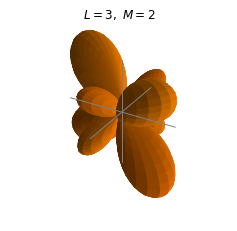

In [ ]:
title = '$L=3,\ M=2$'
fig_name ='Nitrogen_3p_L3_M2.png'
compute_32_Y(0.02, 'autumn', title, fig_name)

#### Displaying the spatial wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=3)$

#### Setting-up a dictionary of configuration arrays

In [ ]:
T33 = {0: (1,1,  1,1,   2,2,  1,1,  3,3)}

#### Computing and printing the Clebsch-Gordan coefficients

In [ ]:
CG0 = comp_CG(T33, 0)

s33 = ["CG0: {}".format(CG0.doit())]
print(s33)

['CG0: 1']


#### Defining a function which computes the wave function of states of the nitrogen atom with 3 $p$ electrons

In [ ]:
def compute_33_Y(ax_lim, cmap, title, fig_name):
  fig = plt.figure(figsize=plt.figaspect(1.))
  (theta, phi, xyz) = setup_grid()
  ax = fig.add_subplot(projection='3d')

  (Y10a, Y11a, Y1m1a, Y10b, Y11b, Y1m1b, Y10c, Y11c, Y1m1c) = Y_phase(theta, phi)

  Y_00 = float(CG0.doit()) * Y11a * Y11b * Y11c

  Y = Y_00
  
  Yx, Yy, Yz = np.abs(Y) * xyz
  colour_plot(ax, Y, Yx, Yy, Yz, cmap)
  draw_axes(ax, ax_lim, title)
  plt.savefig(fig_name)
  plt.show()
  
  return

#### Displaying the wave function of the excited state of the nitrogen atom with 3 $p$ electrons $(L=3, M=3)$



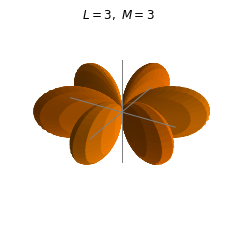

In [ ]:
title = '$L=3,\ M=3$'
fig_name ='Nitrogen_3p_L3_M3.png'
compute_33_Y(0.02, 'autumn', title, fig_name)

## 2.1.3. General formulation of the Pauli exclusion principle

In [ ]:
def frame(mu):
  a = 0
  b = 0
  f = {}
  for k, v in mu.items():
    for c in range(v):
      f[a] = list(range(b+1, b+k+1))
      a += 1
      b += k
  return f

In [ ]:
print("F_21_10 =", frame({2: 1, 1:0}))

F_21_10 = {0: [1, 2]}


In [ ]:
print("F_21_11 =", frame({2: 1, 1:1}))

F_21_11 = {0: [1, 2], 1: [3]}


# 2.2. Postulate 2 – Probability amplitude


## 2.2.1. Computing the radial wavefunctions

In [ ]:
a0 = 5.29177210903e-11

In [ ]:
def comp_ak(n):
  n = max(n,1)
  # Create a dictionary with integer keys, starting with a0
  dict = {0: a0}
  for l in range (n-1):
    for k in range(n-l-1):
      ak = dict.get(k)
      #display("l: {}, k: {}, ak: {}".format(l, k, ak))
      dict[k+1] = ak*(k+l+1-n)/((k+1)*(k+2*l+2))
  return dict

In [ ]:
d = comp_ak(10)
for k, v in d.items():
  print("{}, {}".format(k,v))

0, 5.29177210903e-11
1, -2.9398733939055554e-12
2, 1.9455044518492647e-13
3, -1.5749321753065475e-14
4, 1.615315051596459e-15
5, -2.2027023430860805e-16
6, 4.2830323337784895e-17
7, -1.3257004842647707e-17
8, 7.954202905588625e-18
9, -1.458270532691248e-17


In [ ]:
from sympy.physics.hydrogen import R_nl
from sympy.abc import r, Z

In [ ]:
R_nl(1, 0, r, Z)

2*sqrt(Z**3)*exp(-Z*r)

In [ ]:
R_nl(2, 0, r, Z)

sqrt(2)*(-Z*r + 2)*sqrt(Z**3)*exp(-Z*r/2)/4

In [ ]:
R_nl(2, 1, r, Z)

sqrt(6)*Z*r*sqrt(Z**3)*exp(-Z*r/2)/12

## 2.2.2. Probability amplitude for a hydrogen anion $(H^-)$

In [ ]:
from sympy import symbols, integrate, exp, oo
x = symbols('x')
integrate(x**2 *exp(-2*x),(x,0,oo))

1/4

In [ ]:
from sympy import symbols, sin, pi
x = symbols('x')
integrate(sin(x),(x,0,pi))

2

In [ ]:
integrate(1,(x,0,2*pi))

2*pi

# 2.3. Postulate 3 – Measurable quantities and operators

## 2.3.1. Hermitian operator

## 2.3.2. Unitary operator

## 2.3.3. Density matrix and mixed quantum states

## 2.3.4. Position operation

## 2.3.5. Momentum operation

In [ ]:
from sympy import symbols, sin, cos
x = symbols('x')
integrate(cos(x)*sin(x),(x,0,pi))

0

## 2.3.6. Kinetic Energy operation

## 2.3.7. Potential Energy operation 

In [ ]:
from sympy import symbols, integrate, exp, DiracDelta, oo
x, y = symbols('x y')
integrate(x**2 * exp(-2*x) * integrate(y**2 * exp(-2*y)*DiracDelta(x - y),(y,0,oo)),(x,0,oo))

3/128

In [ ]:
from sympy import symbols, integrate, exp, DiracDelta, oo
x, y = symbols('x y')
integrate(x**2 * exp(-2*x) * integrate(DiracDelta(x - y),(y,0,oo)),(x,0,oo))

1/4

## 2.3.8. Total Energy operation

# 2.4. Postulate 4 – Time independent stationary states

# 2.5. Postulate 5 – Time evolution dynamics
## Schrödinger’s equation


# Questions

1.	What quantum numbers do the total wave function depend on?

In [ ]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "n, l, m_l, s, m_s"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. What is the Clebsch-Gordan coefficient if we couple together $l_1 = 0$ and $m_1 = 0$ and $l_2 = 1$, $m_2 = 0$ to $L=1, M=0$

In [ ]:
#@title Enter your answer as an integer or 0 for a solution, then execute cell.
answer =  2#@param {type:"integer"}
solution = 1
if answer == solution:
  print("Correct")
elif answer == 0:
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. What happens to the total wave function upon application of an antisymmetric operation? It is multiplied by?

In [ ]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "-1"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


4. For a pure fermionic state, is the Young frame horizontal or vertical?

In [ ]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "vertical"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


5. What is the position operator for the Z direction? Is it $\hat{\boldsymbol{r}}_{j_{z}} \psi\left(\boldsymbol{r}_{1}, \ldots, \boldsymbol{r}_{N}\right)=\mathrm{z}_{j} \psi\left(\boldsymbol{r}_{1}, \ldots, \boldsymbol{r}_{N}\right)$ ?

In [ ]:
#@title Enter your answer 'yes' or 'no' in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "yes"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


6. What is the sum of potential and kinetic energy?

In [ ]:
#@title Enter your answer in lowercase or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "total energy"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again
